In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '../data/Resume.csv'

df = pd.read_csv(file_path)

In [3]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [4]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [6]:
def clean_line_terminators(text):
    if pd.isna(text):
        return ""
    return text.replace('\u2028', ' ').replace('\u2029', ' ')

df['Resume_str'] = df['Resume_str'].apply(clean_line_terminators)        

In [7]:
df['Resume_str'][0][:700]       # showing first 700 characters of the frist resume

'         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General '


Catefory values: ['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']
Category value counts:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE         

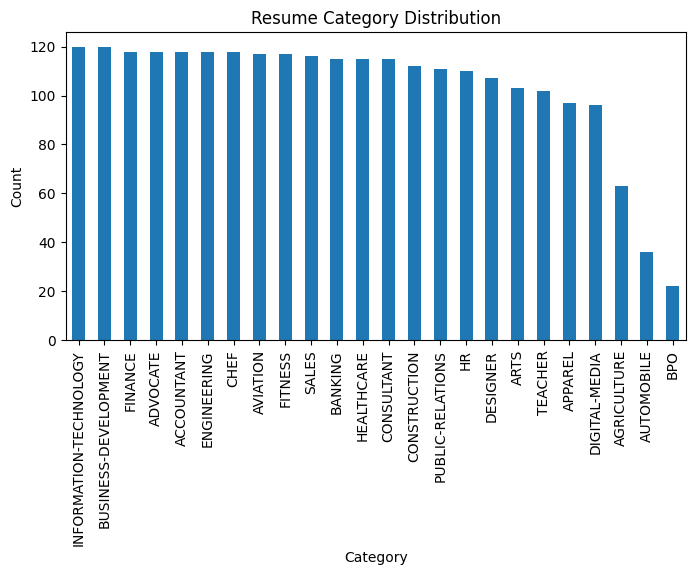

In [9]:
if 'Category' in df.columns:
    print("\nCatefory values:", df['Category'].unique())
    print("Category value counts:")
    print(df['Category'].value_counts())
    plt.figure(figsize=(8,4))
    df['Category'].value_counts().plot(kind = 'bar')
    plt.title('Resume Category Distribution')
    plt.ylabel('Count')
    plt.show()

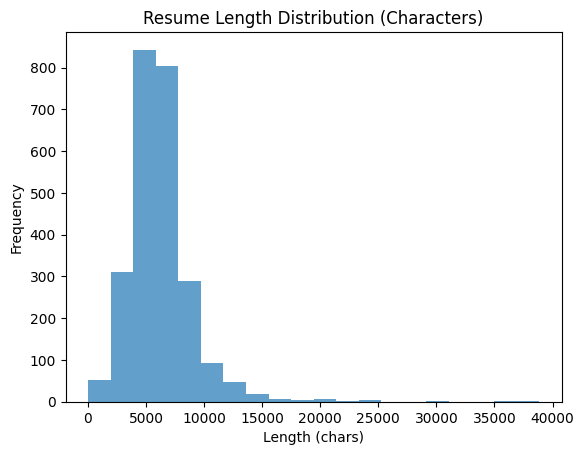

In [10]:
df['resume_length'] = df['Resume_str'].apply(lambda x: len(str(x)))
plt.hist(df['resume_length'], bins = 20, alpha = 0.7)
plt.title("Resume Length Distribution (Characters)")
plt.xlabel("Length (chars)")
plt.ylabel("Frequency")
plt.show()

In [11]:
df.to_csv('../data/Resume_cleaned.csv', index = False, encoding = 'utf-8')
print("\nCleaned data saved to '../data/Resume_cleaned.csv'")


Cleaned data saved to '../data/Resume_cleaned.csv'
